# Overview and Motivation

# Related Work

# Initial Questions

# Data

## Collection and Cleaning

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# read google play store apps data
googleDF = pd.read_csv("data/googleplaystore.csv")

googleDF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
googleDF["Installs"].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

#### If we decided to drop all the missing values, we will be dropping 1481 rows which is corresponding to dropping 1481 apps. This approach is not suitable because we will be losing valuable data.

In [3]:
googleShape = googleDF.shape
missingData = googleShape[0] - googleDF.dropna().shape[0]
print(googleShape)
print(missingData)

(10841, 13)
1481


#### Counting the number of all missing values for each column

In [4]:
missing_values = googleDF.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### Each row should represent one app and therefore the number of unique apps should be equal to the number of rows.

In [5]:
googleDF.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

#### The number of rows exceeded the number of apps, and therefore there are duplicate values for the apps.
#### We will drop all duplicate rows.

In [6]:
# This is the number of duplicated apps.
print(googleDF.loc[googleDF['App'].duplicated(keep = 'first'), :].shape)

# new dataset with all duplicated apps dropped.
uniqueDF = googleDF.drop_duplicates(subset = ['App'], keep = 'first')

# Now the number rows matches the number of unique apps.
print(uniqueDF.shape)

# We reduced the number of missing values.
print(uniqueDF.isnull().sum())

(1181, 13)
(9660, 13)
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### We're handling the issues in the Category column

In [7]:
# We observed the unique values of category and found one odd value which is 1.9
uniqueDF['Category'].unique()

# We viewed the record with the odd category value and found out that the whole row has incorrect values for 
# their corresponding columns. The values are shifted one row to the left.
uniqueDF[uniqueDF['Category'] == '1.9']

# We got the row index for that specific row
rowNumber = np.where(uniqueDF['Category'] == '1.9')[0][0]

# We corrected the row by shifting it to the right
uniqueDF.iloc[rowNumber, 1:] = uniqueDF.iloc[rowNumber, 1:].shift(1)

# The column values are now correct, but we have a missing category value.
# We checked play store and got the category of that app and manually inserted it.
uniqueDF.iloc[rowNumber, 1] = 'LIFESTYLE'

uniqueDF.iloc[rowNumber]

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

#### We removed the dollar sign from the price column and the + sign from the Installs column

In [8]:
temp = uniqueDF

# We converted the string to integers.
def extract_num(x):
    return int(''.join(n for n in x if n.isdigit()))

temp['Installs'] = temp['Installs'].map(extract_num)
temp['Price'] = temp['Price'].map(extract_num)

uniqueDF

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### We decided to unify the values in the column Size, in which all the values were in the same units (MB)

In [9]:
# Function that checks if the size is in KB, it then converts it to MB.
def convert_to_mega(K):
    if K[-1] == 'k':
        ret = float(K[:-1])
        return ret / 1024
    elif K[-1] == 'M':
        ret = float(K[:-1])
        return ret
    return K

uniqueDF['Size'] = uniqueDF['Size'].map(convert_to_mega)
uniqueDF

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### We will replace the null value in the Ratings column with the mean of the apps in the same category

In [10]:
# We changed the type of the column to numeric to be able to calculate its mean
uniqueDF['Rating'] = pd.to_numeric(uniqueDF['Rating'])

# We groupedby the category and replace the null values in the Ratings columns with their categories mean
uniqueDF['Rating'] = uniqueDF.groupby("Category").transform(lambda x: x.fillna(x.mean()))

uniqueDF.head()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### There are only 12 records with null values, so we decided to drop them

In [11]:
uniqueDF.dropna(inplace = True)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Check if there is still any null values

In [12]:
uniqueDF.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### rename the columns to suite the type of its values

In [13]:
uniqueDF.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size (M)', 'Minimum Number of Installs', 'Type',
       'Price ($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

uniqueDF

,App,Category,Rating,Reviews,Size (M),Minimum Number of Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.166552,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb 

### What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

### Exploring which app type is most commonly added to Android Store (Free vs Paid)

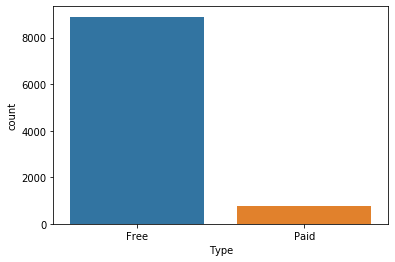

In [15]:
sb.countplot(x='Type',data=uniqueDF)

##### We can tell from the results, that more than 8000 apps are free while less than 2000 are paid apps.

### How many apps are free or paid?

   Type  Apps_Percentage
0  Free        92.195274
1  Paid         7.804726
AxesSubplot(0.125,0.125;0.775x0.755)


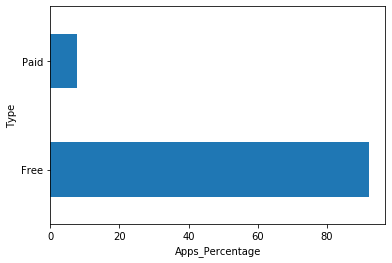

In [16]:
# We wanted to find the percentage of apps that are free and those that are paid
appCountPerType = uniqueDF.groupby('Type',as_index=False)['App'].count()
appCountPerType['App'] = appCountPerType['App']/appCountPerType['App'].sum() * 100
appCountPerType.columns = ['Type' , 'Apps_Percentage']
print(appCountPerType)


# We then plotted a bar chart to compare between both types.
graph = appCountPerType['Apps_Percentage'].plot(kind = 'barh')
plt.xlabel('Apps_Percentage')
plt.ylabel('Type')
plt.yticks(appCountPerType.index,appCountPerType["Type"].values)
print(graph)

# We changed the value in the App column to percentage format to make it clearer.
#appCountPerType['App'] = appCountPerType['App'].astype(int).astype(str)
#appCountPerType['App'] = appCountPerType['App'].apply(lambda x: x+'%')

##### From previous graph we can see that 92% of apps in Android store are of type Free. We will investigate the reason behind this.

### Now getting to see relation between Ratings and (Category/Type)

               Category  Ratings_Mean
0        ART_AND_DESIGN      4.375748
1     AUTO_AND_VEHICLES      4.190411
2                BEAUTY      4.278571
3   BOOKS_AND_REFERENCE      4.344970
4              BUSINESS      4.098479
5                COMICS      4.181481
6         COMMUNICATION      4.121484
7                DATING      3.970149
8             EDUCATION      4.364407
9         ENTERTAINMENT      4.135294
10               EVENTS      4.435556
11               FAMILY      4.179762
12              FINANCE      4.115563
13       FOOD_AND_DRINK      4.172340
14                 GAME      4.247368
15   HEALTH_AND_FITNESS      4.243033
16       HOUSE_AND_HOME      4.150000
17   LIBRARIES_AND_DEMO      4.179066
18            LIFESTYLE      4.092017
19  MAPS_AND_NAVIGATION      4.036441
20              MEDICAL      4.166552
21   NEWS_AND_MAGAZINES      4.121569
22            PARENTING      4.300000
23      PERSONALIZATION      4.331585
24          PHOTOGRAPHY      4.157414
25         P

Text(0.5, 1, 'Rating VS Category')

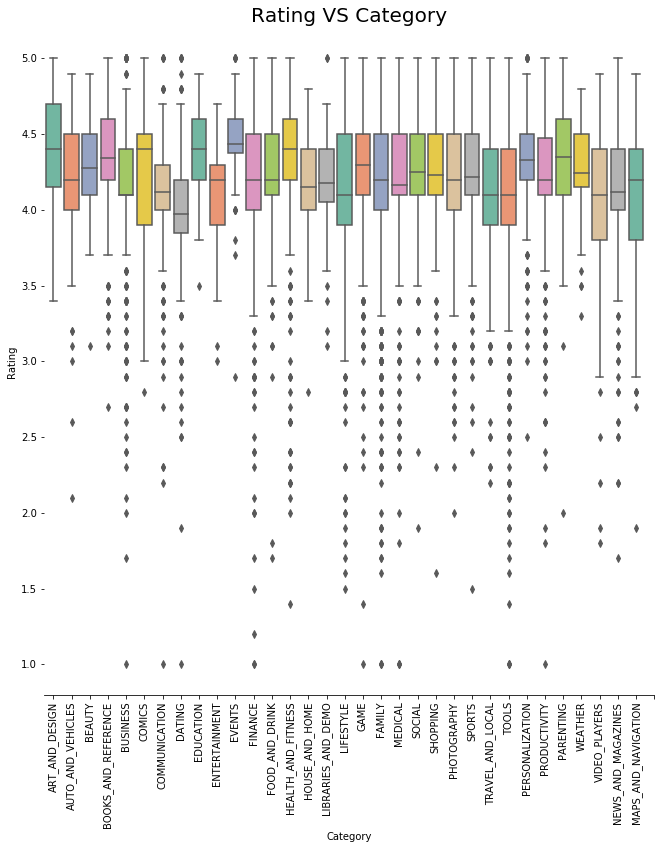

In [17]:
# method which returns a dataframe grouped by the input(col) and rating attribute mean
def get_mean_rating(df, col):
    mean = df.groupby(col,as_index=False)['Rating'].mean()
    return mean

#dataframe of category and ratings mean
MeanRatingsPerCategory = get_mean_rating(uniqueDF, 'Category')
MeanRatingsPerCategory.columns = ['Category' , 'Ratings_Mean']
print(MeanRatingsPerCategory)

g = sb.catplot(x="Category",y="Rating",data=uniqueDF, kind="box", height = 10 ,
palette = "Set2")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Rating VS Category',size = 20)

##### From Box Plot , we can see that all categories available in android store are succeeding with similar mean values of ratings. We can also see that Event Apps have the highest ratings mean while Dating Apps have lowest ratings mean.

   Type  Ratings_Mean
0  Free      4.165887
1  Paid      4.247260


Text(0.5, 1, 'Rating VS Type')

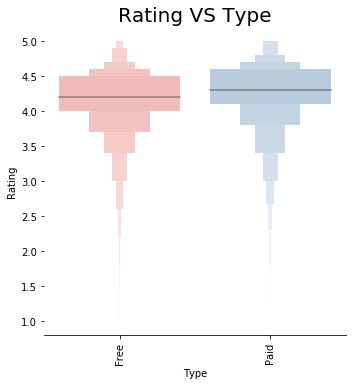

In [18]:
#dataframe of type and ratings mean
MeanRatingsPerType = get_mean_rating(uniqueDF, 'Type')
MeanRatingsPerType.columns = ['Type' , 'Ratings_Mean']
print(MeanRatingsPerType)

g = sb.catplot(x="Type",y="Rating",data=uniqueDF, kind="boxen", height = 5 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Rating VS Type',size = 20)

##### From Box Plot , we can see that free apps and paid apps have nearly equal ratings values.

### Which category of Apps are usually not free to install? 

In [19]:
# method that sets type column to booleans -- free type to 0 and paid type to 1. To see only paid types later
def get_paid_bool(intype):
    if (intype == 'Free'):
        return 0
    return 1

#method that applies get_paid_bool method to the dataframe
def change_paid_to_bool(df):
    ret = df.copy()
    ret['Type'] = ret['Type'].map(get_paid_bool)
    return ret


df_paid = change_paid_to_bool(uniqueDF)


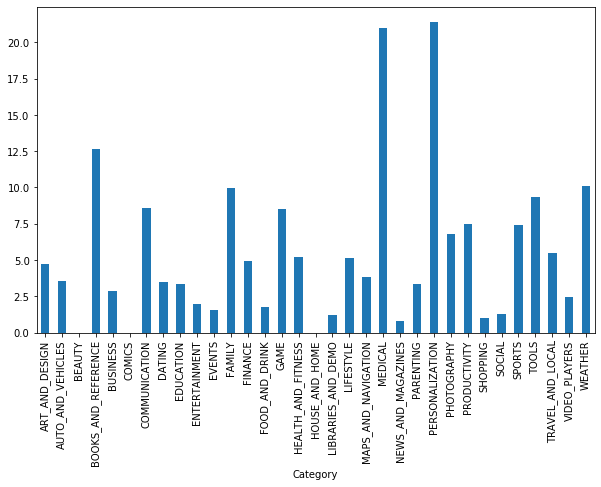

In [20]:
#return paid count percentage per input(col) which is other attribute
def get_paid_sum(df, col):
    ret = (df.groupby(col)['Type'].sum()/ df.groupby(col)['Type'].count())*100
    return ret

#showing percentage of categories per Paid type only
CatPerPaid = get_paid_sum(df_paid, 'Category')
# print(CatPerPaid)
CatPerPaid.plot(kind = 'bar' , figsize = (10,6))


##### We can see that the percentage of paid apps is peaking in medical and personalization categories.

### Are paid apps downloaded as much as free apps?

Text(0.5, 1, 'Type VS Installs')

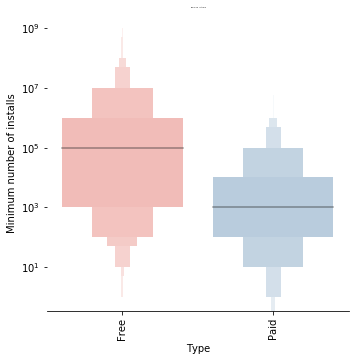

In [21]:
g = sb.catplot(x="Type",y="Minimum Number of Installs",data=uniqueDF, kind="boxen", height = 5 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.yscale('log')
g = g.set_ylabels("Minimum number of installs")
plt.title('Type VS Installs',size = 2)

#### No, paid apps are not downloaded as much as free apps, paid apps have a relatively lower number downloads than the free apps.

### Is there a relationship between the number of reviews and the number of downloads?

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


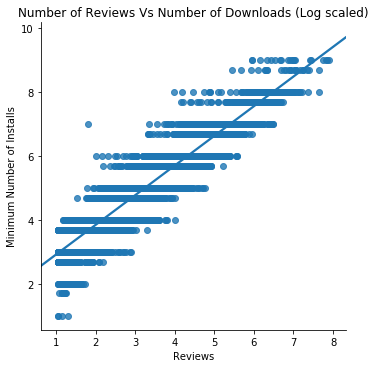

In [33]:
uniqueDF['Reviews'] = pd.to_numeric(uniqueDF['Reviews'])
df_copy = uniqueDF.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy['Minimum Number of Installs'] > 0]

df_copy['Minimum Number of Installs'] = np.log10(uniqueDF['Minimum Number of Installs'])
df_copy['Reviews'] = np.log10(uniqueDF['Reviews'])

sb.lmplot("Reviews", "Minimum Number of Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

#### There is a positive correlation between the number of reviews and the number of installs. As the number of reviews increasem, the number of minimum installs increases.Thus, this correlation shows that users tend to install apps that are reviewed by a large number of people. I
#### Moreover, this can also mean that a considerable amount of users give feedbacks or reviews after installing an app.


### Is there a relationship between the number of installs and the app size?

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


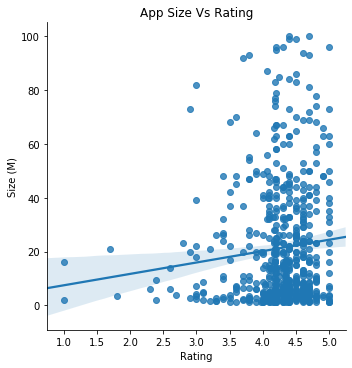

In [43]:
df = uniqueDF
df['Size (M)'] = df['Size (M)'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

df['Size (M)'] = pd.to_numeric(df['Size (M)'])

df = df[df.Type == 'Paid']
df = df[df['Size (M)'] > 1]

#df['Minimum Number of Installs'] = np.log10(df['Rating'])
#df['Size'] = np.log10(uniqueDF['Reviews'])

sb.lmplot( "Rating","Size (M)", data=df)
ax = plt.gca()
_ = ax.set_title('App Size Vs Rating')


#### The scatter plot shows a condensation between the high ratings (3.5 - 5.0)  and the small app sizes (between roughly 5M till 18M), for paid apps. Concluding that, most of the paid apps in the Android Store with high ratings, are of small sizes. This could refer that for a more successful paid app, it is advisable to consider the size to be relatively small.

# DO NOT TOUCH

### Distribution of content rating within each category

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


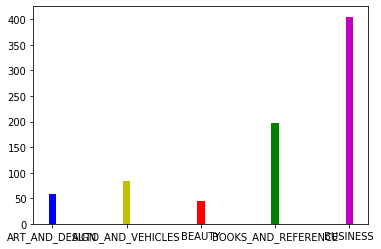

In [107]:
contentRating = uniqueDF['Content Rating'].unique()


uniqueDF['Counter'] = 1

group = uniqueDF.groupby(['Category', 'Content Rating'], as_index = False)['Counter'].sum()
#grouped = group.to_frame()
categories = group['Category'].unique()
categoriesSize = categories.size
contentRating = group['Content Rating'].unique()
crSize = contentRating.size
count = group['Counter']

colors = ['b','y','r','g','m','k']




    
plt.show()
 


In [53]:
categories = uniqueDF['Category'].unique()
categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# We merged between both previous tables.
merged = pd.merge(appCountPerType, installsCountPerType)
merged

In [ ]:
for x in range(5):
    g = group[group['Category']== categories[x]]
    plt.bar(categories[x] , g['Counter'], color = colors[x], width = 0.1)

for x in range(5):
    g = group[group['Category']== categories[x]]
    plt.bar(categories[x] , g['Counter'], color = colors[x], width = 0.1)


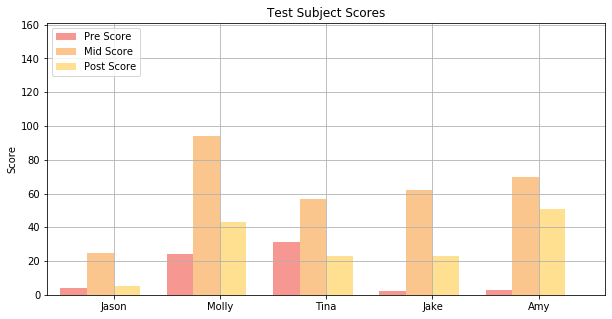

In [109]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

# Setting the positions and width for the bars
pos = list(range(len(df['pre_score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()